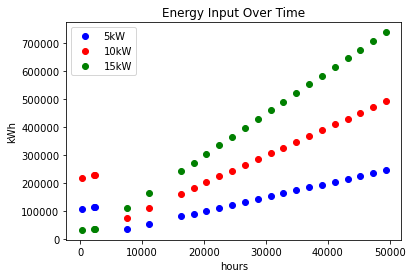

In [8]:
# NON TABLE DATA
import numpy as np 
import pandas as pd 
import numpy.linalg as la 
import matplotlib.pyplot as plt
from io import StringIO

# Helper Functions 
def minusparse(line):
    newline = ""
    for i in range(len(line)):
        if(line[i] == '-'):
            newline += " " + line[i]
        else:
            newline += line[i]
    return newline

def equalparse(line):
    temp = [x.strip() for x in line.split("=")]
    temp[-1] = temp[-1][:-1]
    return temp 
# END HELPER FUNCTIONS

# Open file 
def nontabledata(file_name):
    cnt = 0 
    f = open(file_name, "r")
    data = ""
    features = [str(i) for i in range(0, 14)]

    # Get non-tables 
    for _ in range(22):
        prevline1 = ""
        prevline2 = ""
        line = f.readline()

        # get position
        if(len(line.split()) == 0):
            line = 'NONE'
        while(line.split()[0] != "TOTAL"):
            prevline2 = prevline1
            prevline1 = line
            line = f.readline()
            if(len(line.split()) == 0):
                line = 'NONE'

        # get hours 
        prevline2 = minusparse(prevline2)
        hours = [x for x in prevline2.split(" ") if x != ''][0]

        # get non-table 
        newline = minusparse(line)
        newline = equalparse(newline)
        data += str(hours)
        while newline[0] != '':        
            # add to data 
            data += "," + newline[1]

            # update 
            newline = minusparse(f.readline())
            newline = equalparse(newline)
        cnt += 1
        data += '\n'

    # Convert to pandas object 
    TESTDATA = StringIO(data)
    df = pd.read_csv(TESTDATA, header=None)
    df.columns = features
    
    return df 

# DF mapping 
'''
  0 - hours 
  1 - TOTAL ENERGY INPUT BTU 
  2 - SEASONAL ENERGY INPUT BTU 
  3 - SEASONAL ENERGY INPUT GAL FUEL 
  4 - SEASONAL ENERGY RATE BTU/HR
  5 - TOTAL ENERGY INPUT GAL FUEL 
  6 - AVERAGE LB. WATER PER LB. FUEL
  7 - SEASONAL LB. WATER PER LB. FUEL
  8 - ENERGY FROM AIR TO ICE BTU
  9 - SEASONAL ENERGY LOSS, AIR TO ICE BTU 
  10 - TOTAL WATER WITHDRAWN GAL
  11 - SEASONAL WATER WITHDRAWN GAL 
  12 - TOTAL WATER LOSS GAL
  13 - SEASONAL WATER LOSS GAL
'''

#Graph data for each column vs hours 
#for name in features: 
#    plt.scatter(df["0"], df[name])
#    plt.xlabel("hours")
#    plt.ylabel(name)
#    plt.title(name + " vs. hours")
#    plt.show()
 
df = nontabledata("2_5kW_68deg_10Gal_MF REDONE.DAT")
df2 = nontabledata("3_10kW_68deg_10Gal_MF REDONE.DAT")
df3 = nontabledata("4_15kW_68deg_10Gal_MF REDONE.DAT")
kWh_5 = df["1"] / 3412 * 10**9
kWh_10 = df2["1"] / 3412 * 10**9
kWh_15 = df3["1"] / 3412 * 10**9

plt.plot(df["0"], kWh_5, 'bo', label = '5kW')
plt.plot(df2["0"], kWh_10, 'ro', label = '10kW')
plt.plot(df3["0"],kWh_15, 'go', label = '15kW')


plt.xlabel("hours")
plt.ylabel("kWh")
plt.title("Energy Input Over Time")


leg = plt.legend()



Text(0, 0.5, 'Depth')

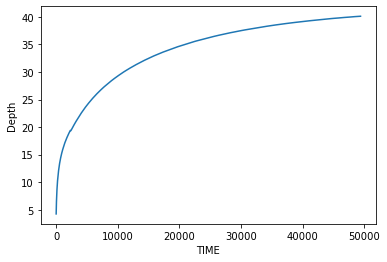

In [9]:
# READING FROM TABLES
import numpy as np 
import pandas as pd 
import numpy.linalg as la 
import matplotlib.pyplot as plt
from io import StringIO

# Helper Functions 
def minusparse(line):
    newline = ""
    for i in range(len(line)):
        if(line[i] == '-'):
            newline += " " + line[i]
        else:
            newline += line[i]
    return newline

def dataparse(line):
    temp = [x for x in line.split(" ") if x != '']
    temp[-1] = temp[-1][:-1]
    string_temp = ""
    for item in temp:
        string_temp += "," + item
    return string_temp 
# END HELPER FUNCTIONS

# Open file
def tabledata(file_name):
    cnt = 0 
    f = open("OUTPUT_MARS.DAT", "r")
    for _ in range(15): # eliminate beginning text 
        __ = f.readline()

    # Get first table 
    data = "" 
    features = [x for x in f.readline().split(" ") if x != '']
    features[-1] = features[-1][0:2]
    for _ in range(29):
        newline = minusparse(f.readline())
        temp = [x for x in newline.split(" ") if x != '']
        temp[-1] = temp[-1][:-1]
        string_temp = ""
        for item in temp:
            string_temp += "," + item
        data += str(cnt) + string_temp + "\n"
        cnt += 1

    # Get tables 
    for _ in range(21):
        line = f.readline()
        if(len(line.split()) == 0):
            line = 'NONE'
        while(line.split()[0] != "START"):
            line = f.readline()
            if(len(line.split()) == 0):
                line = 'NONE'
        line = f.readline() # eliminate empty line 
        line = f.readline() 

        newline = minusparse(line)
        while newline != '\n':
            data += str(cnt) + dataparse(newline) + "\n"
            newline = minusparse(f.readline())
            cnt += 1

    # Convert to pandas object 
    TESTDATA = StringIO(data)
    df = pd.read_csv(TESTDATA, names=features)

    return df

# Graph data for each column vs TIME 
df1 = tabledata("2_5kW_68deg_10Gal_MF REDONE.DAT.DAT")

plt.plot(df1["TIME"], df1["D"])
plt.xlabel("TIME")
plt.ylabel("Depth")